#   About Data 
    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('e:credit/UCI_Credit_Card.csv')
df = df.sample(n=2000,replace =False,random_state=1)

In [3]:
df.shape

(2000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10747 to 18714
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2000 non-null   int64  
 1   LIMIT_BAL                   2000 non-null   float64
 2   SEX                         2000 non-null   int64  
 3   EDUCATION                   2000 non-null   int64  
 4   MARRIAGE                    2000 non-null   int64  
 5   AGE                         2000 non-null   int64  
 6   PAY_0                       2000 non-null   int64  
 7   PAY_2                       2000 non-null   int64  
 8   PAY_3                       2000 non-null   int64  
 9   PAY_4                       2000 non-null   int64  
 10  PAY_5                       2000 non-null   int64  
 11  PAY_6                       2000 non-null   int64  
 12  BILL_AMT1                   2000 non-null   float64
 13  BILL_AMT2                   

there are no null value present

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
10747,10748,310000.0,1,3,1,32,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12573,12574,10000.0,2,3,1,49,-1,-1,-2,-1,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29676,29677,50000.0,1,2,1,28,-1,-1,-1,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8856,8857,80000.0,2,3,1,52,2,2,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21098,21099,270000.0,1,1,2,34,1,2,0,0,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [7]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
23295,23296,160000.0,2,1,2,25,-1,0,-1,-1,...,2199.0,10856.0,0.0,1000.0,11426.0,2199.0,10000.0,0.0,9867.0,0
15148,15149,250000.0,1,1,1,53,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18666,18667,50000.0,2,1,2,23,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3415,3416,200000.0,2,2,1,37,0,0,0,0,...,191730.0,171269.0,151550.0,8017.0,8000.0,8000.0,9000.0,7000.0,6000.0,0
18714,18715,420000.0,2,1,2,28,0,0,-1,0,...,65592.0,57438.0,31029.0,1010.0,64513.0,2420.0,1473.0,1062.0,1022.0,0


EDA

0 for non defaulter
1 for defaulter

In [8]:
df = df.rename(columns={'default.payment.next.month': 'default','PAY_0': 'PAY_1'})

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='count'>

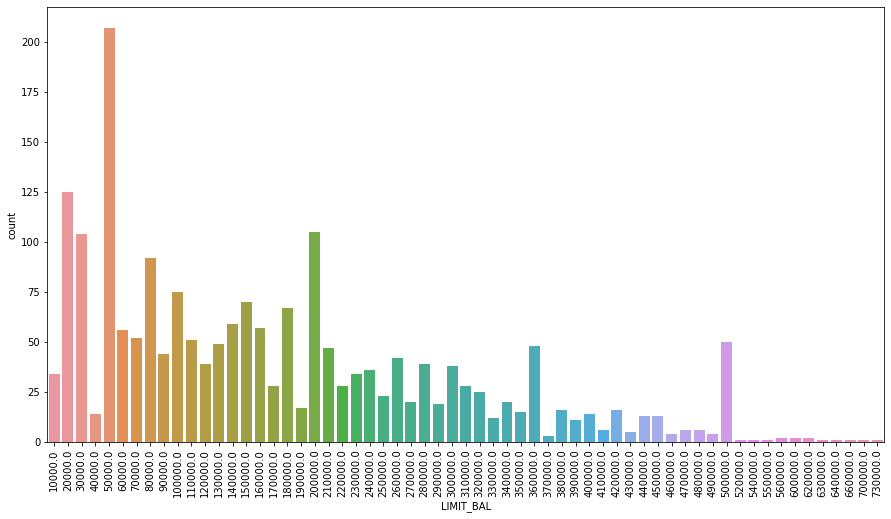

In [9]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(data=df,x="LIMIT_BAL")


50000.0     207
20000.0     125
200000.0    105
30000.0     104
80000.0      92
Name: LIMIT_BAL, dtype: int64


C:\Users\amrit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

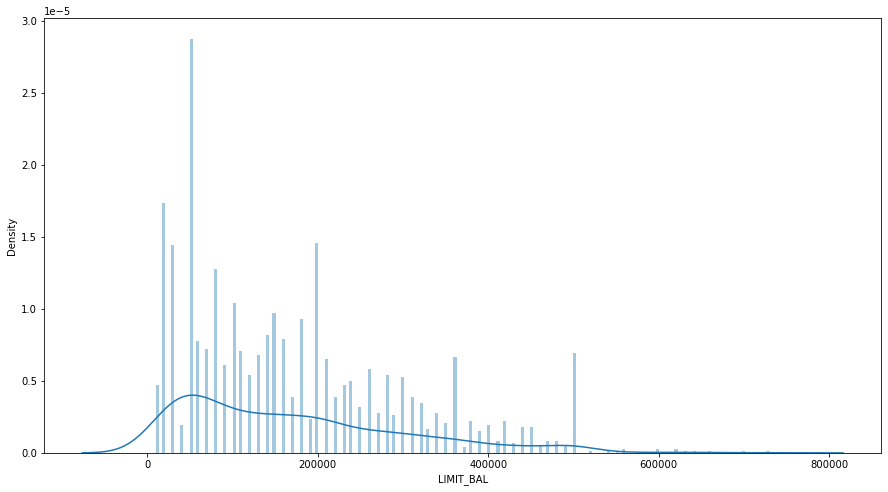

In [10]:
print(df['LIMIT_BAL'].value_counts().head(5))
plt.figure(figsize=(15,8))
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200)

C:\Users\amrit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amrit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


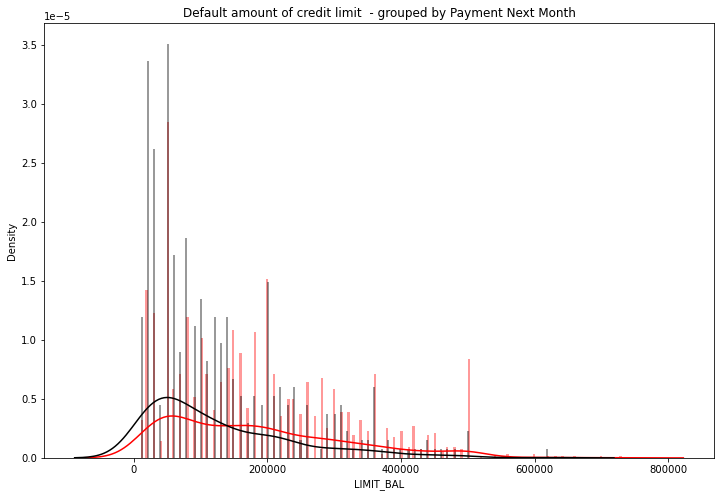

In [11]:
# Amount of credit limit grouped by default payment next month
group_1 = df.loc[df['default'] == 0]["LIMIT_BAL"]
group_2 = df.loc[df['default'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (12,8))
plt.title('Default amount of credit limit  - grouped by Payment Next Month')
sns.set_color_codes("pastel")
sns.distplot(group_1,kde=True,bins=200, color="red")
sns.distplot(group_2,kde=True,bins=200, color="black")
plt.show()

<AxesSubplot:xlabel='index', ylabel='SEX'>

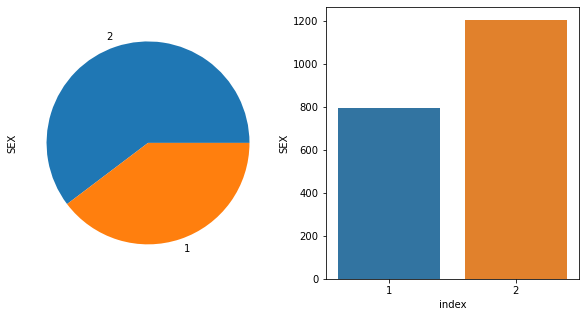

<Figure size 936x576 with 0 Axes>

In [12]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
Day_df=df['SEX'].value_counts().reset_index()
plt.figure(figsize=(13,8))
df['SEX'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='SEX',data=Day_df,ax = axes[1])

In [13]:
df['EDUCATION'].unique()

array([3, 2, 1, 5, 4, 6], dtype=int64)

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

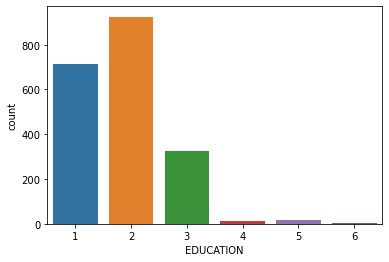

In [14]:
sns.countplot(data=df,x='EDUCATION')

In [15]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

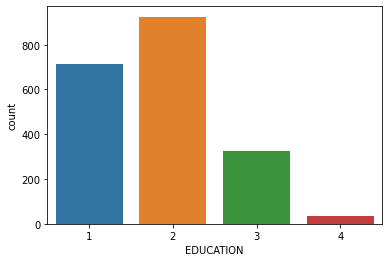

In [16]:
sns.countplot(data=df,x='EDUCATION')

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

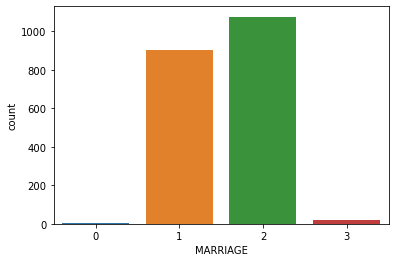

In [17]:
sns.countplot(data=df,x='MARRIAGE')

In [18]:
fil = (df.MARRIAGE == 0) 
df.loc[fil, 'MARRIAGE'] = 3

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

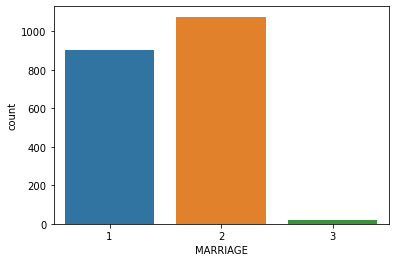

In [19]:
sns.countplot(data=df,x='MARRIAGE')

<AxesSubplot:xlabel='AGE', ylabel='count'>

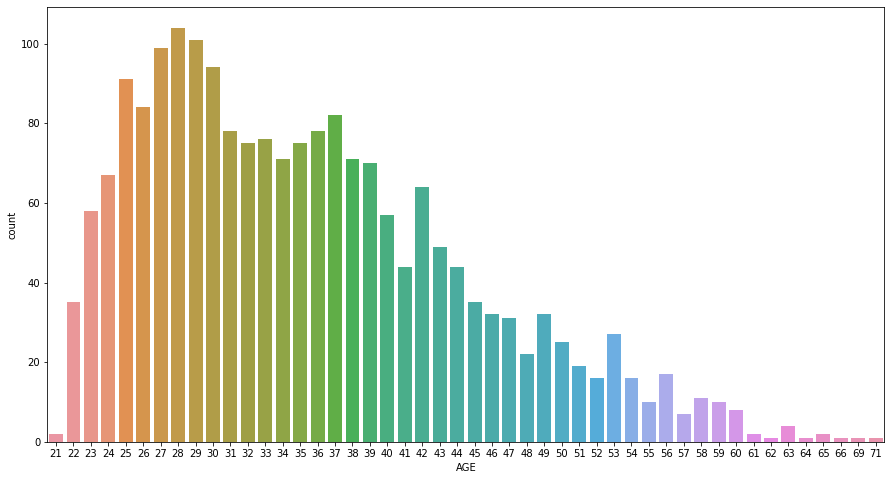

In [20]:
plt.figure(figsize = (15,8))
sns.countplot(data=df,x='AGE')

<AxesSubplot:xlabel='PAY_1', ylabel='count'>

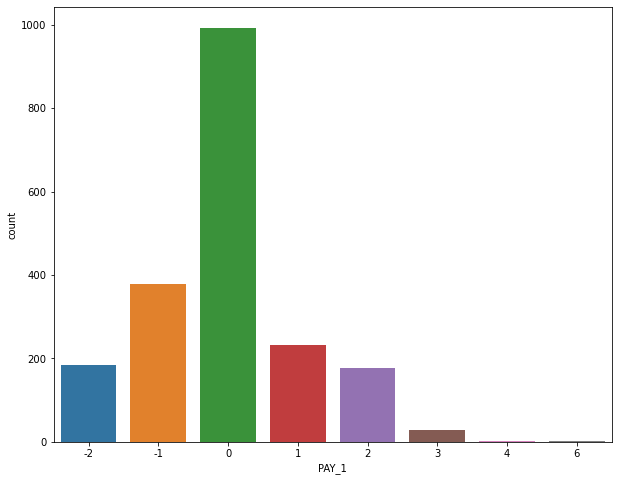

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='PAY_1')

<AxesSubplot:xlabel='PAY_2', ylabel='count'>

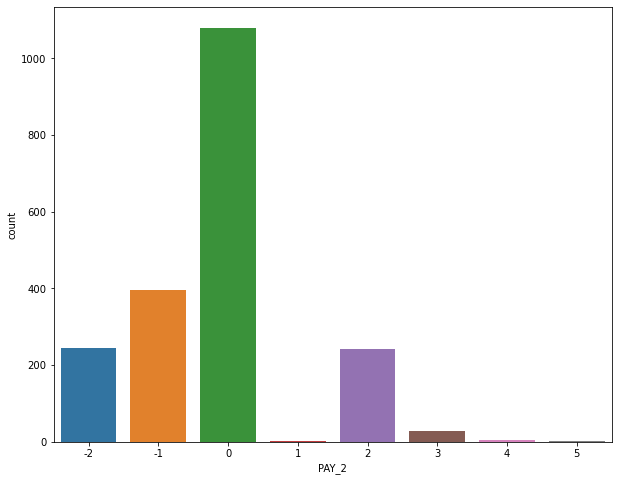

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='PAY_2')

<AxesSubplot:xlabel='PAY_3', ylabel='count'>

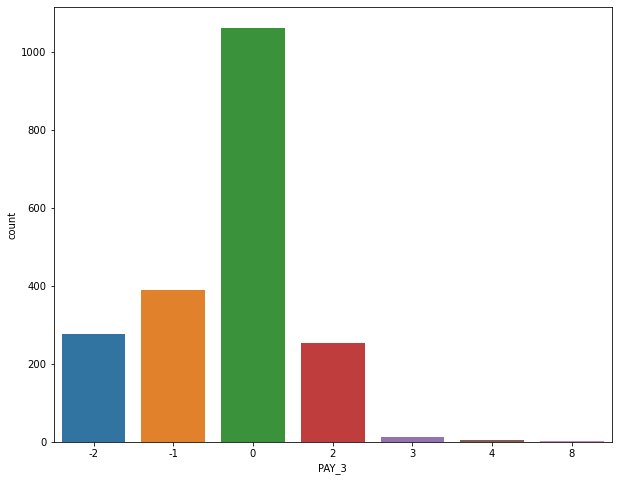

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='PAY_3')

<AxesSubplot:xlabel='PAY_4', ylabel='count'>

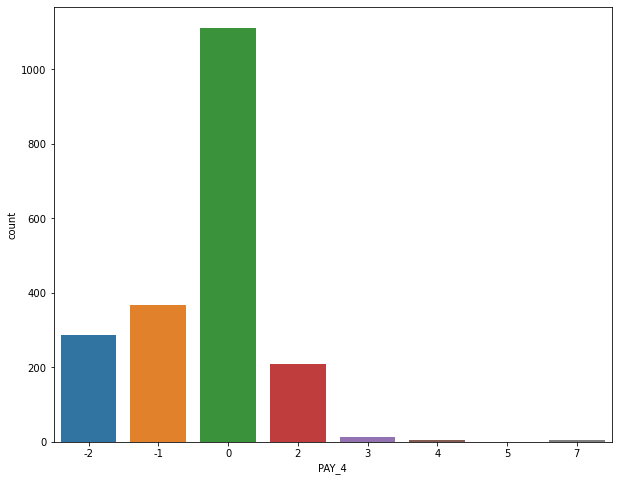

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='PAY_4')

<AxesSubplot:xlabel='PAY_5', ylabel='count'>

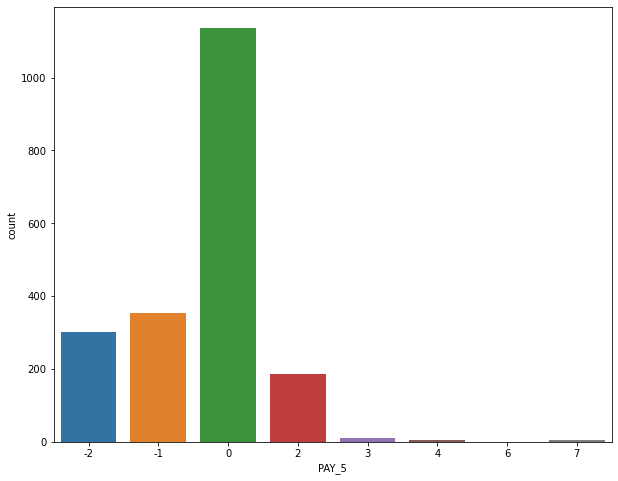

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='PAY_5')

<AxesSubplot:xlabel='PAY_6', ylabel='count'>

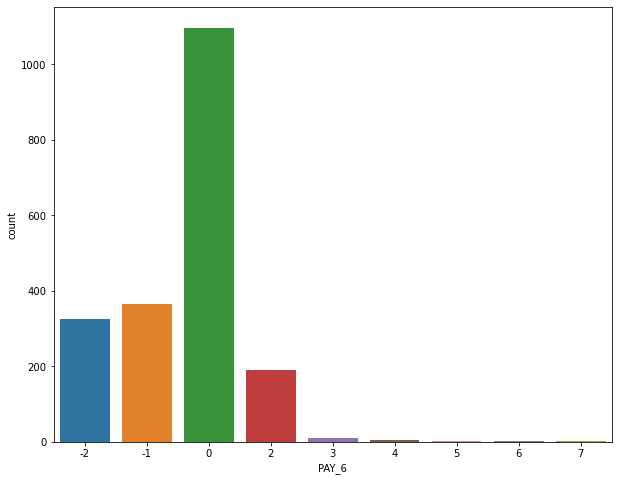

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='PAY_6')

# DATA Cleaning

In [27]:
df.drop('ID', axis = 1, inplace =True)

remove ID coloum because it seems not nesesery it's like sequencial no and sequence does not matters on predition

from the last 6 plots we can see and form that data we get that -1,-2 and 0 are pay due on time lets morage these three coloums for better to analysis

In [28]:
fil = (df.PAY_1 == -1) | (df.PAY_1==-2)
df.loc[fil,'PAY_1']=0
df.PAY_1.value_counts()
fil = (df.PAY_2 == -1) | (df.PAY_2==-2)
df.loc[fil,'PAY_2']=0
df.PAY_2.value_counts()
fil = (df.PAY_3 == -1) | (df.PAY_3==-2)
df.loc[fil,'PAY_3']=0
df.PAY_3.value_counts()
fil = (df.PAY_4 == -1) | (df.PAY_4==-2)
df.loc[fil,'PAY_4']=0
df.PAY_4.value_counts()
fil = (df.PAY_5 == -1) | (df.PAY_5==-2)
df.loc[fil,'PAY_5']=0
df.PAY_5.value_counts()
fil = (df.PAY_6 == -1) | (df.PAY_6==-2)
df.loc[fil,'PAY_6']=0
df.PAY_6.value_counts()

0    1788
2     190
3      10
4       5
7       3
5       2
6       2
Name: PAY_6, dtype: int64

<AxesSubplot:title={'center':'SEX Vs DEFAULT'}, xlabel='SEX', ylabel='count'>

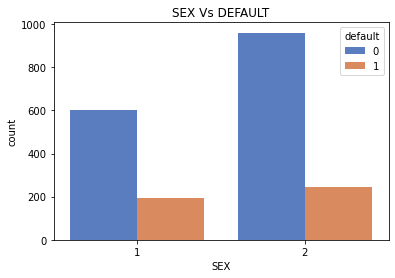

In [29]:
plt.title('SEX Vs DEFAULT')
sns.countplot(x='SEX', data=df,hue="default", palette="muted")  

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

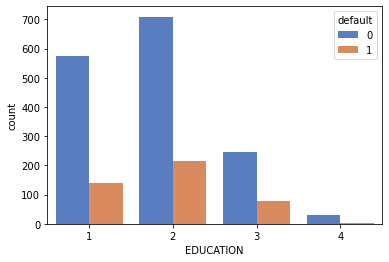

In [30]:
sns.countplot(x='EDUCATION', data=df,hue="default", palette="muted")  

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

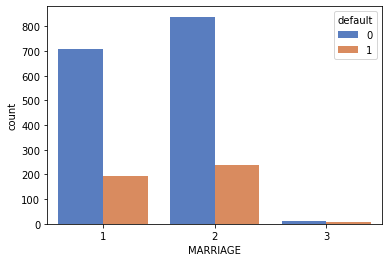

In [31]:
sns.countplot(x='MARRIAGE', data=df,hue="default", palette="muted")  

<AxesSubplot:xlabel='default', ylabel='AGE'>

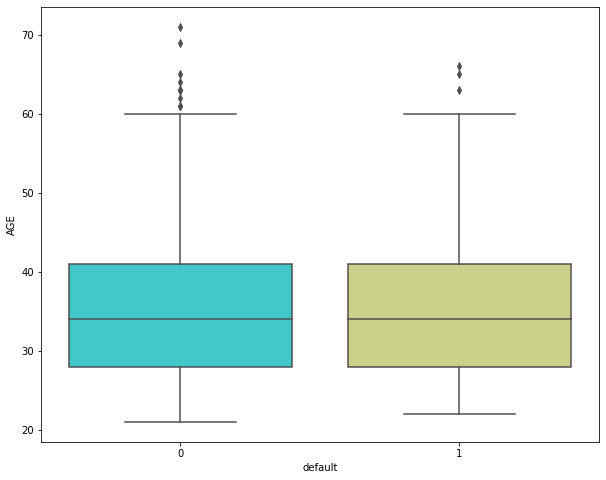

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(x='default',y='AGE',data=df,palette='rainbow')

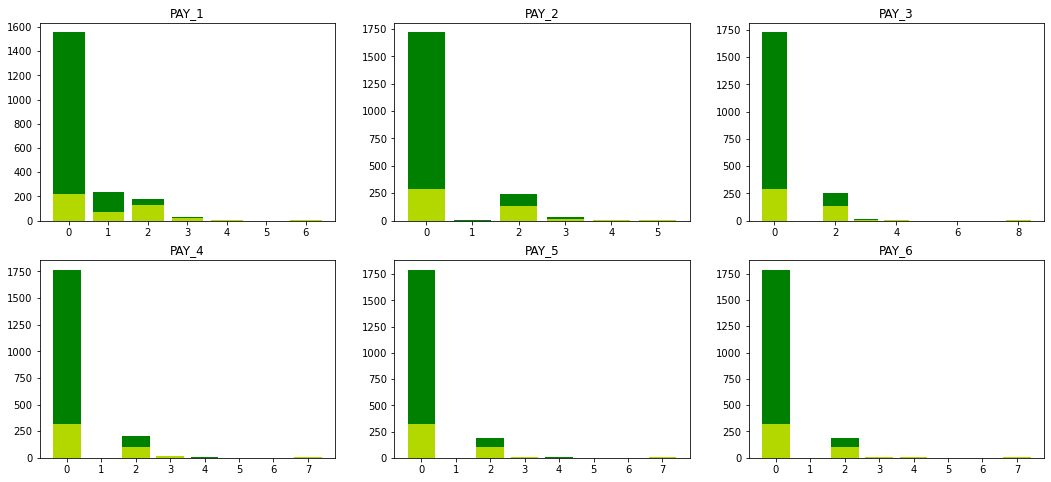

In [33]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3
    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['default']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='green')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])

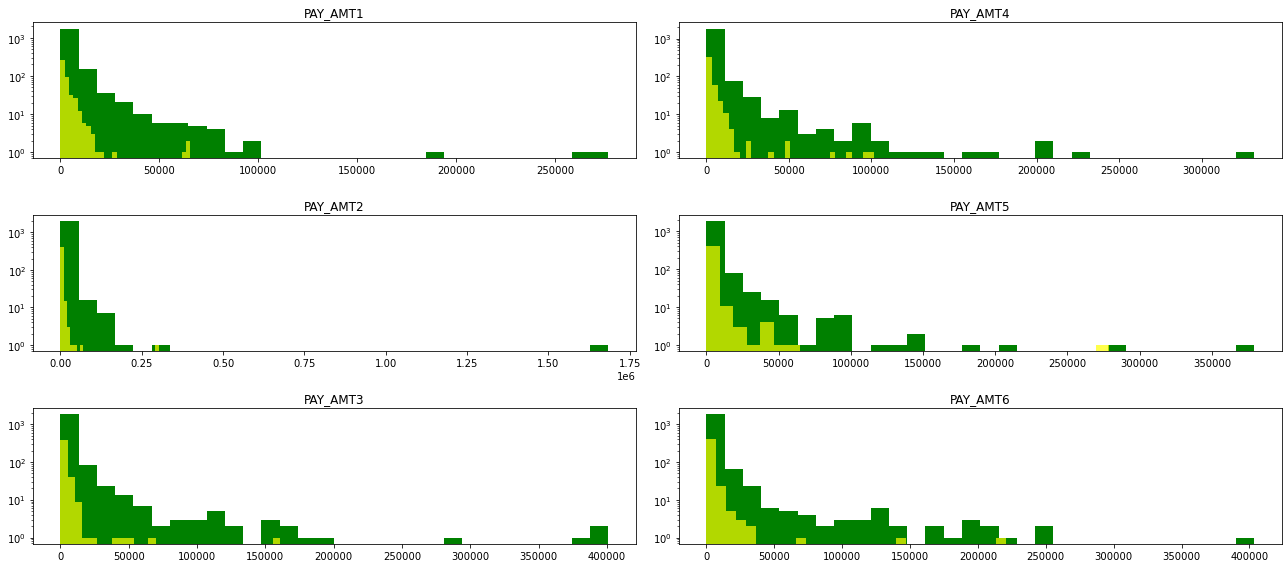

In [34]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)

for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[pay_amt_columns[i]], 30, color ='green')
    ax[row,col].hist(df[pay_amt_columns[i]][(df['default']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log')
plt.tight_layout()
plt.show()


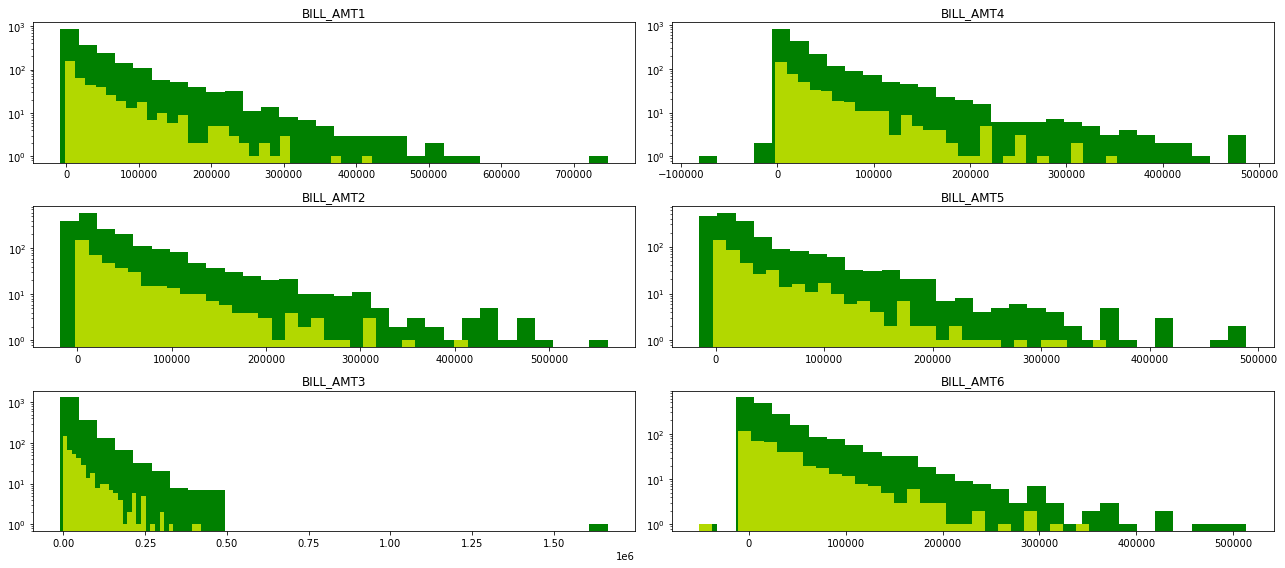

In [35]:
pay_amt_columns = getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)

for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[pay_amt_columns[i]], 30, color ='green')
    ax[row,col].hist(df[pay_amt_columns[i]][(df['default']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log')
plt.tight_layout()
plt.show()


# Observing Correlation between features of the Dataset

In [36]:
correlation = df.corr()

<AxesSubplot:>

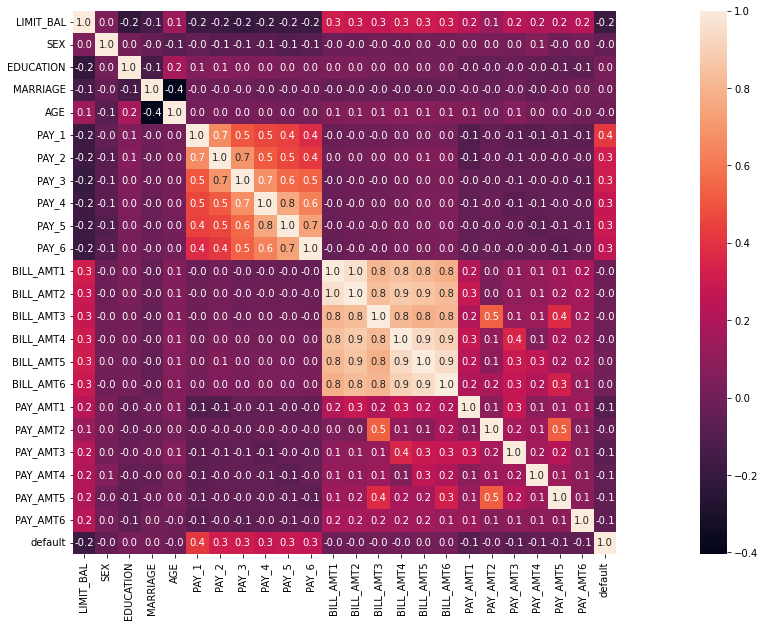

In [37]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" ) 

<AxesSubplot:title={'center':'Correlation with Default'}>

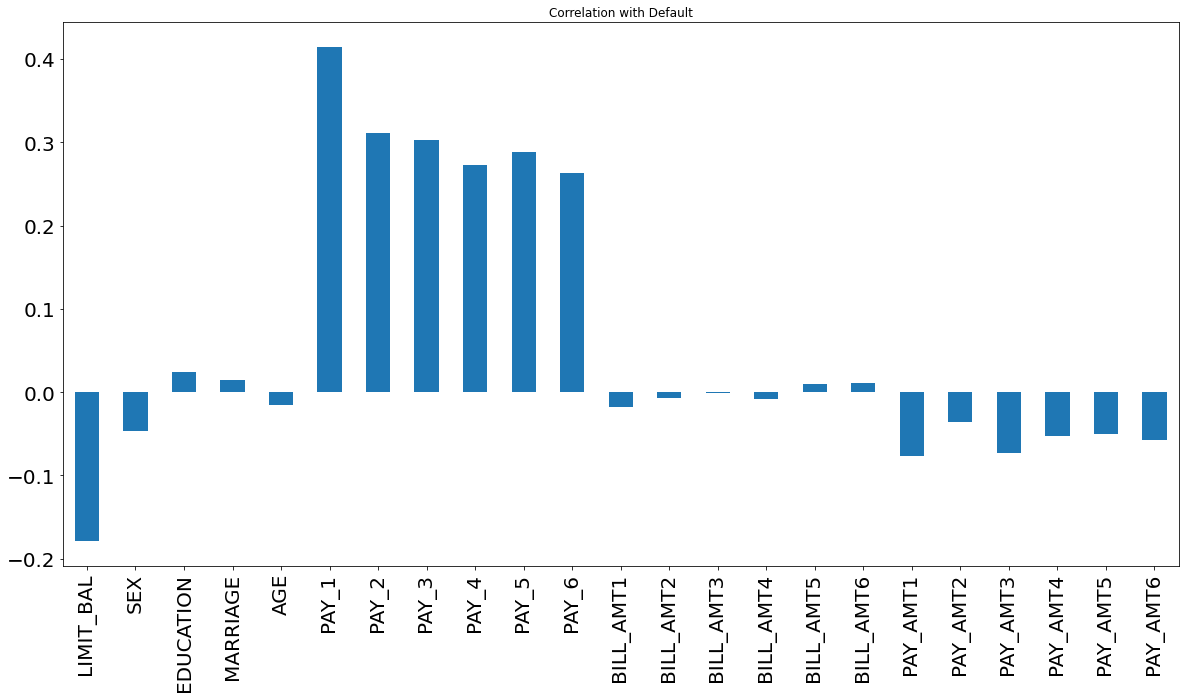

In [38]:
X = df.drop(['default'],axis=1)
X.corrwith(df['default']).plot.bar(figsize = (20, 10), title = "Correlation with Default",fontsize = 20,rot = 90)

# Feature Scaling of Numerical Attributes

In [39]:
col_to_norm = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df[col_to_norm] = df[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [40]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
10747,1.050233,1,3,1,-0.378229,0,0,0,0,0,...,0.607543,0.262893,-0.421472,0.240538,-0.009029,-0.095826,-0.129128,-0.245872,-0.175478,0
12573,-1.229991,2,3,1,1.481197,0,0,0,0,2,...,-0.648831,-0.651960,-0.640356,-0.394515,-0.158517,-0.149403,-0.314384,-0.295614,-0.269353,1
29676,-0.925961,1,2,1,-0.815741,0,0,0,0,0,...,0.024083,-0.649344,0.071838,-0.394515,0.993958,-0.178111,-0.234107,2.368160,-0.204297,0
8856,-0.697939,2,3,1,1.809331,2,2,3,3,3,...,-0.055342,-0.027241,0.015930,-0.111248,-0.118654,-0.205540,-0.314384,-0.209386,-0.194253,1
21098,0.746203,1,1,2,-0.159473,1,2,0,0,2,...,-0.333412,-0.420150,-0.368873,-0.394515,-0.058859,-0.187254,-0.314384,-0.185062,-0.175478,0


# Spiliting Dataset

In [41]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [43]:
x_train.shape ,y_train.shape

((1400, 23), (1400,))

In [44]:
x_test.shape,y_test.shape

((600, 23), (600,))

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [46]:
y_pred = logmodel.predict(x_test)

In [47]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.826667,0.694915,0.322835,0.44086,0.64239


# Stochastic Gradient Descent

In [48]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(x_train, y_train)

SGDClassifier(loss='log', penalty='l1', random_state=1)

In [49]:
y_pred = sgd.predict(x_test)

In [50]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Stochastic Gradient Descent,0.816667,0.666667,0.267717,0.382022,0.615888


# K-Nearest Neighbour

    KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

    KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.

    We can implement a KNN model by following the below steps:

    Load the data
    Initialise the value of k
    For getting the predicted class, iterate from 1 to total number of training data points
    Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
    Sort the calculated distances in ascending order based on distance values
    Get top k rows from the sorted array
    Get the most frequent class of these rows
    Return the predicted class
    Let's go ahead and use the elbow method to pick a good K Value!

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
error_rate = []

# it Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

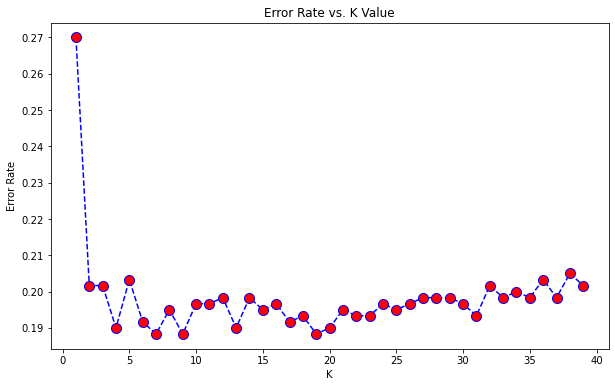

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)

In [55]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [56]:
y_pred = knn.predict(x_test)

In [57]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.81,0.666667,0.204724,0.313253,0.58862


# Support Vector Machine

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possib

In [58]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(x_train, y_train)

SVC(random_state=0)

In [59]:
y_pred = scv.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [61]:
cm

array([[460,  13],
       [103,  24]], dtype=int64)

In [62]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.806667,0.648649,0.188976,0.292683,0.580746


# Gaussian Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [64]:
y_pred =naive_bayes.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [66]:
cm

array([[391,  82],
       [ 53,  74]], dtype=int64)

In [67]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.775,0.474359,0.582677,0.522968,0.704658


# Decision Tree Classification

The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

Advantages of Decision Trees -
Decision trees are easy to interpret. To build a decision tree requires little data preparation from the user- there is no need to normalize data

Disadvantages of Decision Trees-
Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper.

In [68]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [69]:
dct.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [70]:
y_pred = dct.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[392,  81],
       [ 82,  45]], dtype=int64)

In [72]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.728333,0.357143,0.354331,0.355731,0.591542


# Random Forest Classification

Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

Step1:- Pick at random K data points from the training set

Step2:- Build the Decision tree associated to these K data points

Step3:- Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

Step4:- For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [74]:
y_pred = rfc.predict(x_test)

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[452,  21],
       [ 91,  36]], dtype=int64)

In [76]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.813333,0.631579,0.283465,0.391304,0.619534


# XGBOOST classifier
It is Gradient Boosting Algorithm

In [77]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [78]:
y_pred =xgb.predict(x_test)

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [80]:
cm

array([[438,  35],
       [ 86,  41]], dtype=int64)

In [81]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.798333,0.539474,0.322835,0.403941,0.624419


# Model Optimization using Grid Search and K-Fold Cross validation

In [82]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

# 1)Grid Search on Logistic Regression Model

In [83]:
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)
grid_search_log = grid_search_log.fit(x_train,y_train)

C:\Users\amrit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\amrit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amrit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\amrit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

In [84]:
best_accuracy = grid_search_log.best_score_

In [85]:
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.82


In [86]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 10, 'class_weight': None, 'penalty': 'l2'}

In [87]:
y_pred_log = grid_search_log.predict(x_test)

In [88]:
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

In [89]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825,0.683333,0.322835,0.438503,0.641333


# 2)Grid Search on Stochastic Gradient Descent

In [90]:
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}
grid_search_sgd = GridSearchCV(estimator=sgd,param_grid=sgd_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_sgd = grid_search_sgd.fit(x_train,y_train)

In [91]:
best_accuracy_1 = grid_search_sgd.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8150000000000001


In [92]:
best_parameters_2 = grid_search_sgd.best_params_
best_parameters_2

{'alpha': 0.01, 'class_weight': None}

In [93]:
y_pred_sgd = grid_search_sgd.predict(x_test)

In [94]:
sgd_prob = grid_search_sgd.predict_proba(x_test)

In [95]:
roc=roc_auc_score(y_test, y_pred_sgd)
acc = accuracy_score(y_test, y_pred_sgd)
prec = precision_score(y_test, y_pred_sgd)
rec = recall_score(y_test, y_pred_sgd)
f1 = f1_score(y_test, y_pred_sgd)
model =  pd.DataFrame([['Stochastic Gradient Descent Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

C:\Users\amrit\AppData\Local\Temp\ipykernel_11140\1402161187.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(model, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815,0.637931,0.291339,0.400000,0.623471


<AxesSubplot:>

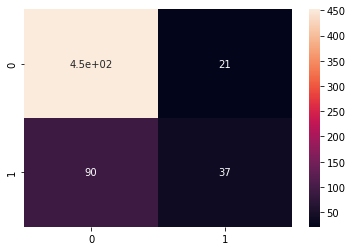

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm,annot=True)

# 3)Grid Search on SVM model 

In [97]:
scv_params = [{'C':[0.001,0.01,0.1,1,10,1000],'kernel':['linear']},{'C':[0.001,0.01,0.1,1,10,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.0001]}]
grid_search_1 = GridSearchCV(estimator=scv,param_grid=scv_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_1 = grid_search_1.fit(x_train,y_train)

In [98]:
best_accuracy_1 = grid_search_1.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8114285714285716


In [99]:
best_parameters = grid_search_1.best_params_
best_parameters

{'C': 0.01, 'kernel': 'linear'}

In [100]:
y_pred_svc =grid_search_1.predict(x_test)

In [101]:
roc=roc_auc_score(y_test, y_pred_svc)
acc = accuracy_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)
model =  pd.DataFrame([['SVC MODEL TUNED', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

C:\Users\amrit\AppData\Local\Temp\ipykernel_11140\3883899968.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(model, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443


# 4)Grid Search on KNN Classifier

In [102]:
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}

In [103]:
grid_search = GridSearchCV(estimator = knn,param_grid = knn_param,scoring='accuracy',cv=5,n_jobs=-1)
grid_search = grid_search.fit(x_train,y_train)

In [104]:
best_accuracy_1 = grid_search.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8107142857142857


In [105]:
best_parameters = grid_search.best_params_
best_parameters

{'leaf_size': 1, 'n_neighbors': 24, 'weights': 'uniform'}

In [106]:
y_pred_KNN = grid_search.predict(x_test)

In [107]:
roc=roc_auc_score(y_test, y_pred_KNN)
acc = accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)
model =  pd.DataFrame([['KNN Model Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

C:\Users\amrit\AppData\Local\Temp\ipykernel_11140\600114077.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(model, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872


# 5)Grid Search on Decision Tree

In [108]:
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=dct,param_grid=parameters,scoring = 'accuracy',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(x_train,y_train)

In [109]:
best_accuracy_1 = grid_search_dt.best_score_

In [110]:
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8242857142857142


In [111]:
best_parameters_2 = grid_search_dt.best_params_
best_parameters_2

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [112]:
y_pred_dct = grid_search_dt.predict(x_test)

In [113]:
roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)
model =  pd.DataFrame([['Decision Tree Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

C:\Users\amrit\AppData\Local\Temp\ipykernel_11140\2020115208.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(model, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872
4,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567


# 6)Grid Search on Random Forest Classifier 

In [114]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(x_train,y_train)

In [115]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.822857142857143


In [116]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': None, 'criterion': 'gini', 'n_estimators': 600}

In [117]:
y_pred_rf = grid_search_rf.predict(x_test)

In [118]:
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

C:\Users\amrit\AppData\Local\Temp\ipykernel_11140\1715665440.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(model, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872
4,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567
5,Random Forest Tuned,0.815000,0.633333,0.299213,0.406417,0.626350


# Grid Search on XGBOOST Classifier

In [119]:
param_grid_xgb ={'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid_xgb,scoring='accuracy',cv=5,n_jobs=-1)
grid_seaech_xgb = grid_search_xgb.fit(x_train,y_train)

In [120]:
best_accuracy_1 = grid_search_xgb.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8142857142857143


In [121]:
best_parameters_2 = grid_search_xgb.best_params_
best_parameters_2

{'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 50}

In [122]:
y_pred_xgb = grid_search_xgb.predict(x_test)

In [123]:
roc=roc_auc_score(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
model =  pd.DataFrame([['XGBOOST Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

C:\Users\amrit\AppData\Local\Temp\ipykernel_11140\2506813591.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(model, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872
4,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567
5,Random Forest Tuned,0.815000,0.633333,0.299213,0.406417,0.626350
6,XGBOOST Tuned,0.800000,0.553846,0.283465,0.375000,0.611077


# ROC Curve

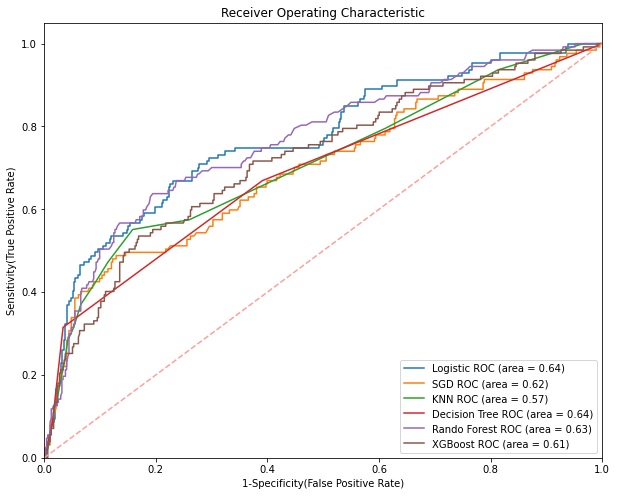

In [124]:
from sklearn import metrics

# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_log_p =grid_search_log.predict_proba(x_test)[:,1]
y_pred_sgd_p =grid_search_sgd.predict_proba(x_test)[:,1]
#y_pred_svc_p =grid_search_1.predict_proba(X_test)[:,1]
y_pred_knn_p =grid_search.predict_proba(x_test)[:,1]
y_pred_dt_p =grid_search_dt.predict_proba(x_test)[:,1]
y_pred_rf_p =grid_search_rf.predict_proba(x_test)[:,1]
y_pred_xgb_p =grid_search_xgb.predict_proba(x_test)[:,1]

model = [grid_search_log,grid_search_sgd,grid_search,grid_search_dt,grid_search_rf,grid_search_xgb]

models=[y_pred_log_p,y_pred_sgd_p,y_pred_knn_p,y_pred_dt_p,y_pred_rf_p,y_pred_xgb_p]
label=['Logistic','SGD','KNN','Decision Tree','Rando Forest','XGBoost']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(6)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(x_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion
1)Using a Logistic Regression classifier, we can predict with 82.5% accuracy, whether a customer is likely to default next month.

2)Using a Stochastic Gradient Descent classifier, we can predict with 83.33% accuracy, whether a customer is likely to default next month.

3)Using a Support Vector Machine classifier, we can predict with 80.83% accuracy, whether a customer is likely to default next month.

4)Using a K-Nearest Neighbour classifier, we can predict with 80.83% accuracy, whether a customer is likely to default next month.

5)Using a Decision Tree classifier, we can predict with 82.83% accuracy, whether a customer is likely to default next month.

6)Using a Random Forest classifier, we can predict with 81% accuracy, whether a customer is likely to default next month.

7)Using a XGBOOST classifier, we can predict with 82.16% accuracy, whether a customer is likely to default next month.